
<font size=5 color=#A52A2A >Deep Q-Learning with an Atari-like game

Yiqing Wang
    
NUID 001563190

In [4]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
#Creating bounds for the buckets 
upper_bounds = [
        CART_POSITION_HIGHER_BOUND, 
        CART_VELOCITY_HIGHER_BOUND, 
        POLE_ANGLE_HIGHER_BOUND, 
        POLE_VELOCITY_HIGHER_BOUND
        ]
lower_bounds = [
        CART_POSITION_LOWER_BOUND, 
        CART_VELOCITY_LOWER_BOUND, 
        POLE_ANGLE_LOWER_BOUND, 
        POLE_VELOCITY_LOWER_BOUND
        ]

def discretize(obs):
    #Discretise the continuous state into buckets
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((BUCKETS[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(BUCKETS[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

In [4]:
class QAgent():
    def __init__(self, env, discount_rate, learning_rate, max_epsilon, min_epsilon, epsilon_decay_rate):
        self.env = env
        #init Q table
        self.q_table = np.zeros(BUCKETS + (env.action_space.n,)) 
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        
    def get_action(self, state):
        exploration_exploitation_tradeoff = np.random.random()
        #Epsilon decay
        if self.max_epsilon > self.min_epsilon:
            self.max_epsilon *= (1-self.epsilon_decay_rate)
            
        if exploration_exploitation_tradeoff <= self.max_epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(self.q_table[state]) 
        return action
    
    def update_qtable(self, current_state, action, reward, new_state):
        self.q_table[current_state][action] += self.learning_rate * (reward + self.discount_rate * np.max(self.q_table[new_state]) - self.q_table[current_state][action])

<font size=5 color=#A52A2A >1.Establish a baseline performance. How well did your Deep Q-learning do on your problem?

With this baseline performance, Deep Q-learning does well on the Cart Pole Environment.

In [5]:
#Baseline parameters
total_episodes = 5000
total_test_episodes = 100
max_steps = 99
learning_rate = 0.7
gamma = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.01 

In [6]:
#Creating an agent with baseline parameters
agent = QAgent(env, gamma, learning_rate, max_epsilon, min_epsilon,epsilon_decay_rate)

In [7]:
total_rewards = []
for episode in range(total_episodes):
    current_state = discretize(env.reset())
    reward_per_epsiode = 0.0
    done = False
    while not done and reward_per_epsiode < 100:
        env.render()
        action = agent.get_action(current_state)
        new_state, reward, done, info = env.step(action) 
        new_state = discretize(new_state)
        agent.update_qtable(current_state, action, reward, new_state)
        current_state = new_state
        reward_per_epsiode += 1
    total_rewards.append(reward_per_epsiode)

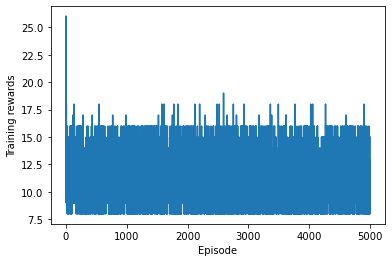

Average Reward or Steps/Episode: 10.776


In [8]:
#Plotting Results
x = range(total_episodes)
plt.plot(x, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Training rewards')
plt.show()

avg_reward = 0
for i in total_rewards:
    avg_reward+=i
avg_reward /= total_episodes
    
print("Average Reward or Steps/Episode: "+str(avg_reward))

<font size=5 color=#A52A2A >2.What are the states, the actions, and the size of the Q-table?

In [6]:
#Importing the environment 
env = gym.make('CartPole-v0')

#Using buckets to discretize the state space
BUCKETS = (1, 1, 6, 12) 

CART_POSITION_BUCKETS = BUCKETS[0]
CART_POSITION_LOWER_BOUND = env.observation_space.low[2]
CART_POSITION_HIGHER_BOUND = env.observation_space.high[2]
CART_POSITION_RANGE = CART_POSITION_HIGHER_BOUND - CART_POSITION_LOWER_BOUND
CART_POSITION_INTERVAL = CART_POSITION_RANGE / float(CART_POSITION_BUCKETS)

CART_VELOCITY_BUCKETS = BUCKETS[1]
CART_VELOCITY_LOWER_BOUND = -0.5
CART_VELOCITY_HIGHER_BOUND = 0.5
CART_VELOCITY_RANGE = CART_VELOCITY_HIGHER_BOUND - CART_VELOCITY_LOWER_BOUND
CART_VELOCITY_INTERVAL = CART_VELOCITY_RANGE / float(CART_VELOCITY_BUCKETS)

POLE_ANGLE_BUCKETS = BUCKETS[2]
POLE_ANGLE_LOWER_BOUND = env.observation_space.low[2]
POLE_ANGLE_HIGHER_BOUND = env.observation_space.high[2]
POLE_ANGLE_RANGE = POLE_ANGLE_HIGHER_BOUND - POLE_ANGLE_LOWER_BOUND
POLE_ANGLE_INTERVAL = POLE_ANGLE_RANGE / float(POLE_ANGLE_BUCKETS)

POLE_VELOCITY_BUCKETS = BUCKETS[3]
POLE_VELOCITY_LOWER_BOUND = -math.radians(50)
POLE_VELOCITY_HIGHER_BOUND = math.radians(50)
POLE_VELOCITY_RANGE = POLE_VELOCITY_HIGHER_BOUND - POLE_VELOCITY_LOWER_BOUND
POLE_VELOCITY_INTERVAL = POLE_VELOCITY_RANGE / float(POLE_VELOCITY_BUCKETS)

print("--------STATE SPACE--------\n")
print("--------CART POSITION--------")
print("Min : "+ str(CART_POSITION_LOWER_BOUND))
print("Max : "+ str(CART_POSITION_HIGHER_BOUND))
print("Range : "+ str(CART_POSITION_RANGE))
print("Interval : "+str(CART_POSITION_INTERVAL)+"\n")

print("--------CART VELOCITY--------")
print("Min : "+ str(CART_VELOCITY_LOWER_BOUND))
print("Max : "+ str(CART_VELOCITY_HIGHER_BOUND))
print("Range : "+ str(CART_VELOCITY_RANGE))
print("Interval : "+str(CART_VELOCITY_INTERVAL)+"\n")

print("--------POLE ANGLE--------")
print("Min : "+ str(POLE_ANGLE_LOWER_BOUND))
print("Max : "+ str(POLE_ANGLE_HIGHER_BOUND))
print("Range : "+ str(POLE_ANGLE_RANGE))
print("Interval : "+str(POLE_ANGLE_INTERVAL)+"\n")

print("--------POLE VELOCITY--------")
print("Min : "+ str(POLE_VELOCITY_LOWER_BOUND))
print("Max : "+ str(POLE_VELOCITY_HIGHER_BOUND))
print("Range : "+ str(POLE_VELOCITY_RANGE))
print("Interval : "+str(POLE_VELOCITY_INTERVAL))
print()

print("--------ACTION SPACE--------")
print("Actions : "+str(env.action_space.n))
print("Push cart to the left : 0")
print("Push cart to the right : 1\n")

print("--------SIZE OF Q TABLE--------")
print(str(np.zeros(BUCKETS + (env.action_space.n,)).shape))

--------STATE SPACE--------

--------CART POSITION--------
Min : -0.41887903
Max : 0.41887903
Range : 0.83775806
Interval : 0.8377580642700195

--------CART VELOCITY--------
Min : -0.5
Max : 0.5
Range : 1.0
Interval : 1.0

--------POLE ANGLE--------
Min : -0.41887903
Max : 0.41887903
Range : 0.83775806
Interval : 0.13962634404500326

--------POLE VELOCITY--------
Min : -0.8726646259971648
Max : 0.8726646259971648
Range : 1.7453292519943295
Interval : 0.14544410433286079

--------ACTION SPACE--------
Actions : 2
Push cart to the left : 0
Push cart to the right : 1

--------SIZE OF Q TABLE--------
(1, 1, 6, 12, 2)


<font size=5 color=#A52A2A >3.What are the rewards? Why did I choose them? 
    
The reward for the cart pole environment is +1 for every step that satisfies the condition (maintaining balance).
Rewards are based on the question statement, i.e. "Balance the cart pole".
    
I chose them because they are easier to present intuitive results and easy to implement

<font size=5 color=#A52A2A >4.How did you choose alpha and gamma in the Bellman equation? Try at least one additional value for alpha and gamma. How did it change the baseline performance?

I chose the alpha and gamma based on explotary analysis. It improved the baseline performance and the distribution had more ocurrences of high value. It also has a larger maximum reward. 

In [9]:
learning_rate = 0.1
gamma = 0.97

In [10]:
#Creating an agent with learning rate and gamma parameters updated
agent = QAgent(env, gamma, learning_rate, max_epsilon, min_epsilon,epsilon_decay_rate)

In [11]:
total_rewards = []
for episode in range(total_episodes):
    current_state = discretize(env.reset())
    reward_per_epsiode = 0.0
    done = False
    while not done and reward_per_epsiode < 100:
        action = agent.get_action(current_state)
        new_state, reward, done, info = env.step(action) 
        new_state = discretize(new_state)
        agent.update_qtable(current_state, action, reward, new_state)
        current_state = new_state
        reward_per_epsiode += 1
    total_rewards.append(reward_per_epsiode)

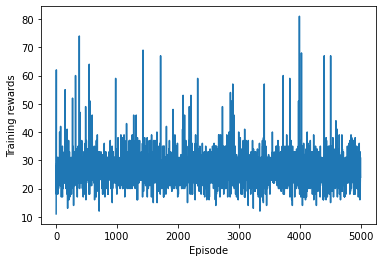

Average Reward or Steps/Epsiode : 26.7002


In [12]:
#Plotting Results
x = range(total_episodes)
plt.plot(x, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Training rewards')
plt.show()

avg_reward = 0
for i in total_rewards:
    avg_reward+=i
avg_reward /= total_episodes
   
print("Average Reward or Steps/Epsiode : "+str(avg_reward))

<font size=5 color=#A52A2A >5.Try a policy other than e-greedy. How did it change the baseline performance?


In [14]:
class QAgent_Median():
    def __init__(self, env, discount_rate, learning_rate, max_epsilon, min_epsilon, epsilon_decay_rate):
        self.env = env
        #init Q table
        self.q_table = np.zeros(BUCKETS + (env.action_space.n,)) 
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        
    def get_action(self, state):
        exploration_exploitation_tradeoff = np.random.random()
        #Epsilon decay
        if self.max_epsilon > self.min_epsilon:
            self.max_epsilon *= (1-self.epsilon_decay_rate)
            
        if exploration_exploitation_tradeoff <= self.max_epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argsort(self.q_table[state])[len(self.q_table[state])//2]
#             action = np.argmin(self.q_table[state])
        return action
    
    def update_qtable(self, current_state, action, reward, new_state):
        self.q_table[current_state][action] += self.learning_rate * (reward + self.discount_rate * np.max(self.q_table[new_state]) - self.q_table[current_state][action])

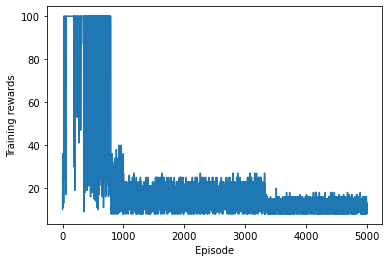

Average Reward or Steps/Epsiode : 23.3842
Epsilon : 0.009990566824312964


In [15]:
total_episodes = 5000
total_test_episodes = 100
max_steps = 99
learning_rate = 0.7
gamma = 0.8
max_epsilon = 5.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005 

#Creating an agent with epsilon changed 
agent = QAgent_Median(env, gamma, learning_rate, max_epsilon, min_epsilon,epsilon_decay_rate)

total_rewards = []
for episode in range(total_episodes):
    current_state = discretize(env.reset())
    reward_per_epsiode = 0.0
    done = False
    while not done and reward_per_epsiode < 100:
        action = agent.get_action(current_state)
        new_state, reward, done, info = env.step(action) 
        new_state = discretize(new_state)
        agent.update_qtable(current_state, action, reward, new_state)
        current_state = new_state
        reward_per_epsiode += 1
    total_rewards.append(reward_per_epsiode)

#Plotting Results
x = range(total_episodes)
plt.plot(x, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Training rewards')
plt.show()

avg_reward = 0
for i in total_rewards:
    avg_reward+=i
avg_reward /= total_episodes
   
print("Average Reward or Steps/Epsiode : "+str(avg_reward))
print("Epsilon : "+str(agent.max_epsilon))

<font size=5 color=#A52A2A >6.How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode?

I chose my decay rate and epsilon based on exploratory analysis. The baseline performance improved again with a different epsilon and epsilon decay rate. The agent looks a bit unstable. Hence, stabilization would be required to understand how the epsilon and epsilon decay rate would change the performance.

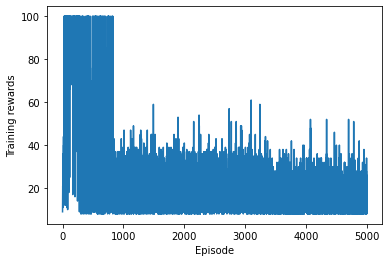

Average Reward or Steps/Epsiode : 22.6784
Epsilon : 0.009990566824312964


In [13]:
total_episodes = 5000
total_test_episodes = 100
max_steps = 99
learning_rate = 0.7
gamma = 0.8
max_epsilon = 5.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005 

#Creating an agent with epsilon changed 
agent = QAgent(env, gamma, learning_rate, max_epsilon, min_epsilon,epsilon_decay_rate)

total_rewards = []
for episode in range(total_episodes):
    current_state = discretize(env.reset())
    reward_per_epsiode = 0.0
    done = False
    while not done and reward_per_epsiode < 100:
        action = agent.get_action(current_state)
        new_state, reward, done, info = env.step(action) 
        new_state = discretize(new_state)
        agent.update_qtable(current_state, action, reward, new_state)
        current_state = new_state
        reward_per_epsiode += 1
    total_rewards.append(reward_per_epsiode)

#Plotting Results
x = range(total_episodes)
plt.plot(x, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Training rewards')
plt.show()

avg_reward = 0
for i in total_rewards:
    avg_reward+=i
avg_reward /= total_episodes
   
print("Average Reward or Steps/Epsiode : "+str(avg_reward))
print("Epsilon : "+str(agent.max_epsilon))

<font size=5 color=#A52A2A >7.What is the average number of steps taken per episode?
    
As shown in the code above, 
Average Reward or Steps/Epsiode : 26.7002

<font size=5 color=#A52A2A >8.Does Q-learning use value-based or policy-based iteration?
    
Q-learning is a values-based learning algorithm. Value based algorithms updates the value function based on an equation(particularly Bellman equation). Whereas the other type, policy-based estimates the value function with a greedy policy obtained from the last policy improvement.

<font size=5 color=#A52A2A >9.Could I use SARSA for this problem?

Yes we can use SARSA in this problem. As the environment is low-cost and fast-iterating Q-Learning would do better but we can implement SARSA equation. The only change required is in the Q equation.

<font size=5 color=#A52A2A >10.What is meant by the expected lifetime value in the Bellman equation? 

The expected lifetime value in the Bellman equation is used to calcuate Q values for the Q table. It is based on the fact that the Q value considers future rewards with the discount factor.

<font size=5 color=#A52A2A >11.When would SARSA likely do better than Q-learning?

SARSA will approach convergence allowing for possible penalties from exploratory moves, whilst Q-learning will ignore them. That makes SARSA more conservative - if there is risk of a large negative reward close to the optimal path, Q-learning will tend to trigger that reward whilst exploring, whilst SARSA will tend to avoid a dangerous optimal path and only slowly learn to use it when the exploration parameters are reduced. If our goal is to train an optimal agent in simulation, or in a low-cost and fast-iterating environment, then Q-learning is a good choice, due to learning optimal policy directly. If your agent learns online, and you care about rewards gained whilst learning, then SARSA may be a better choice.

<font size=5 color=#A52A2A >12.How does SARSA differ from Q-learning?
    
The most important difference between the two is how Q is updated after each action. SARSA uses the Q' following a ε-greedy policy exactly, as A' is drawn from it. In contrast, Q-learning uses the maximum Q' over all possible actions for the next step.

<font size=5 color=#A52A2A >13.Explain the Q-learning algorithm. 


Q-Learning is a Reinforcement learning policy that will find the next best action, given a current state. It chooses this action at random and aims to maximize the reward.

Q-learning is a model-free, off-policy reinforcement learning that will find the best course of action, given the current state of the agent. Depending on where the agent is in the environment, it will decide the next action to be taken. 

The objective of the model is to find the best course of action given its current state. To do this, it may come up with rules of its own or it may operate outside the policy given to it to follow. This means that there is no actual need for a policy, hence we call it off-policy.

Model-free means that the agent uses predictions of the environment’s expected response to move forward. It does not use the reward system to learn, but rather, trial and error.

<font size=5 color=#A52A2A >14.Explaining the SARSA algorithm.

The Sarsa algorithm is an On-Policy algorithm for TD-Learning. The major difference between it and Q-Learning, is that the maximum reward for the next state is not necessarily used for updating the Q-values. Instead, a new action, and therefore reward, is selected using the same policy that determined the original action. The name Sarsa actually comes from the fact that the updates are done using the quintuple Q(s, a, r, s', a'). Where: s, a are the original state and action, r is the reward observed in the following state and s', a' are the new state-action pair. 


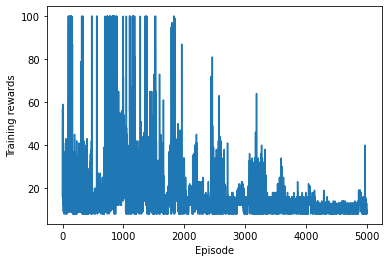

Average Reward or Steps/Epsiode : 17.182


In [16]:
class SARSA_Agent():
    def __init__(self, env, discount_rate, learning_rate, max_epsilon, min_epsilon, epsilon_decay_rate):
        #init Q table
        self.env = env
        self.q_table = np.zeros(BUCKETS + (env.action_space.n,)) 
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        
    def get_action(self, state):
        exploration_exploitation_tradeoff = np.random.random()
        #Epsilon decay
        if self.max_epsilon > self.min_epsilon:
            self.max_epsilon *= (1-self.epsilon_decay_rate)
            
        if exploration_exploitation_tradeoff <= self.max_epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(self.q_table[state])   
        return action
    
    def update_qtable(self, current_state, action, reward, new_state, new_action):
        self.q_table[current_state][action] += self.learning_rate * (reward + self.discount_rate * self.q_table[new_state][new_action] - self.q_table[current_state][action])

agent = SARSA_Agent(env, gamma, learning_rate, max_epsilon, min_epsilon,epsilon_decay_rate)

total_rewards = []
for episode in range(total_episodes):
    current_state = discretize(env.reset())
    reward_per_epsiode = 0.0
    done = False
    while not done and reward_per_epsiode < 100:
        action = agent.get_action(current_state)
        new_state, reward, done, info = env.step(action) 
        new_state = discretize(new_state)
        new_action = agent.get_action(new_state)
        agent.update_qtable(current_state, action, reward, new_state, new_action)
        current_state = new_state
        reward_per_epsiode += 1
    total_rewards.append(reward_per_epsiode)


env.close()
#Plotting Results
x = range(total_episodes)
plt.plot(x, total_rewards)
plt.xlabel('Episode')
plt.ylabel('Training rewards')
plt.show()

avg_reward = 0
for i in total_rewards:
    avg_reward+=i
avg_reward /= total_episodes
   
print("Average Reward or Steps/Epsiode : "+str(avg_reward))

<font size=5 color=#A52A2A >15.What code is yours and what have you adapted? 
    
Implemented the SARSA algorithm, modified the code for epsilon and decay rate attempts to add value, based on citation references.


<font size=5 color=#A52A2A >References
    
[1]: Continuous State Problems : https://www.datamachinist.com/reinforcement-learning/part-6-q-learning-for-continuous-state-problems/

[2]: Epsion Greedy: https://pylessons.com/Epsilon-Greedy-DQN/

[3]: Q-Learning vs. SARSA : https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html

[4]: Q-Learning :https://en.wikipedia.org/wiki/Q-learning


<font size=5 color=#A52A2A >Licensing
    
Copyright 2022 Yiqing Wang

Persons who have obtained a copy of the software and associated documentation files may use the software free of charge without restriction. Publish, distribute, sublicense and/or sell copies of the software, subject to the following conditions:

THIS SOFTWARE IS PROVIDED "AS IS" WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NON-INFRINGEMENT WARRANTIES. 
    
In no event shall the author or copyright holder be liable for any claim, damage or other liability, whether in contract, tort or otherwise, arising out of or in connection with the software or its use or other dealings. software.
